In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("airbnb.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [4]:
# View dataset info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22059 entries, 0 to 22058
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22059 non-null  int64  
 1   name                            22044 non-null  object 
 2   host_id                         22059 non-null  int64  
 3   host_name                       22045 non-null  object 
 4   neighbourhood_group             22059 non-null  object 
 5   neighbourhood                   22059 non-null  object 
 6   latitude                        22059 non-null  float64
 7   longitude                       22059 non-null  float64
 8   room_type                       22058 non-null  object 
 9   price                           22058 non-null  float64
 10  minimum_nights                  22058 non-null  float64
 11  number_of_reviews               22058 non-null  float64
 12  last_review                     

In [5]:
# Check for missing values
df.isnull().sum()


,0
id,0
name,15
host_id,0
host_name,14
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,1
price,1


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df = df[['price', 'minimum_nights', 'number_of_reviews',
         'reviews_per_month', 'calculated_host_listings_count',
         'availability_365']]


In [8]:
df = df.dropna()  # Drop rows with any missing data


In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


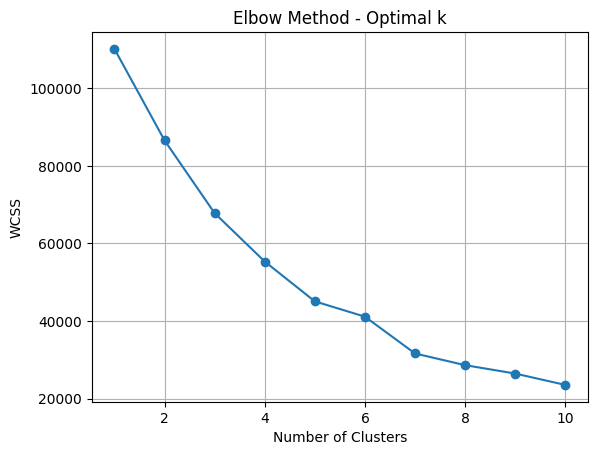

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


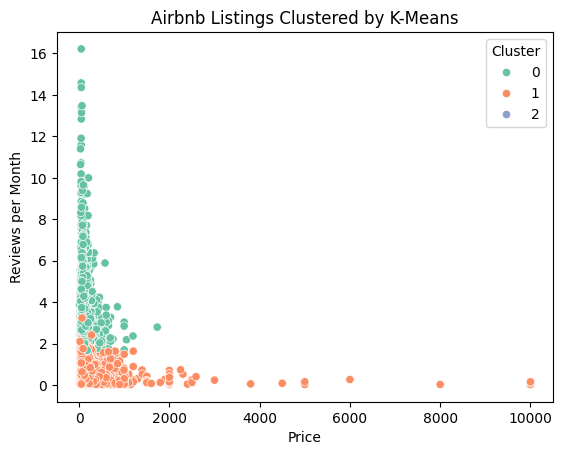

In [12]:
sns.scatterplot(x=df['price'], y=df['reviews_per_month'], hue=df['Cluster'], palette='Set2')
plt.title("Airbnb Listings Clustered by K-Means")
plt.xlabel("Price")
plt.ylabel("Reviews per Month")
plt.show()


In [13]:
df.groupby('Cluster').mean()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
Cluster,,,,,,
0,129.980299,3.226950,140.933018,3.001460,2.018913,190.545837
1,148.294839,6.330356,17.730186,0.414699,1.891890,89.249468
2,165.638202,62.062921,6.105618,0.160809,61.883146,282.840449


In conclusion, the K-Means clustering technique successfully segmented Airbnb listings into distinct groups based on pricing, availability, review patterns, and host activity. This clustering helps in identifying different listing strategies such as budget-friendly, frequently booked listings vs. premium, high-availability options. The Elbow Method was crucial in selecting the right number of clusters, ensuring meaningful separation among groups. This unsupervised learning exercise demonstrates how customer or product segmentation can provide insights into real-world datasets like Airbnb.


In [15]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']


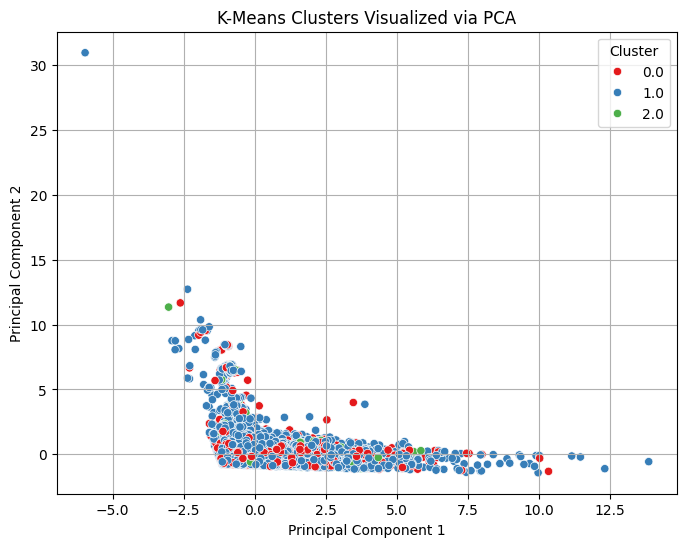

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("K-Means Clusters Visualized via PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [17]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score for k={kmeans.n_clusters}: {score:.4f}")


Silhouette Score for k=2: 0.4683


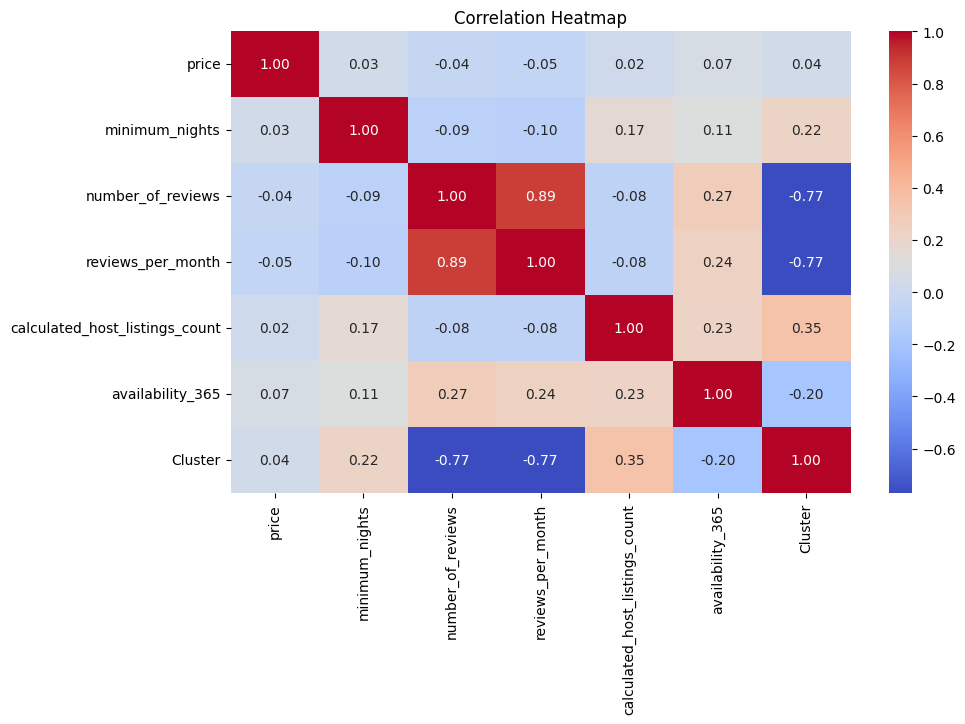

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


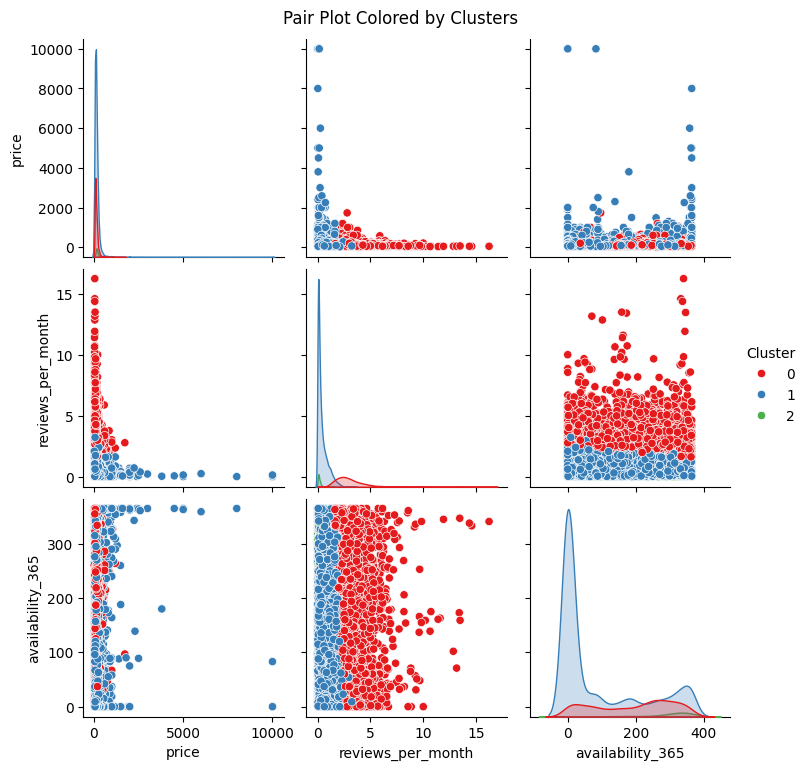

In [19]:
sns.pairplot(df[['price', 'reviews_per_month', 'availability_365', 'Cluster']], hue='Cluster', palette='Set1')
plt.suptitle("Pair Plot Colored by Clusters", y=1.02)
plt.show()


<ipython-input-20-810da834e4ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')


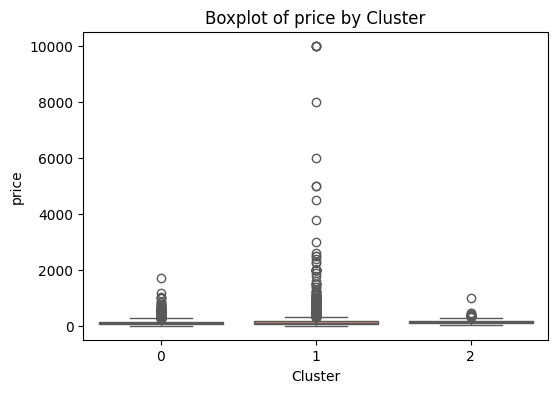

<ipython-input-20-810da834e4ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')


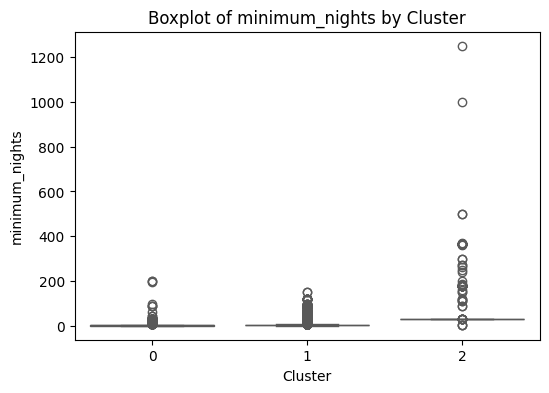

<ipython-input-20-810da834e4ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')


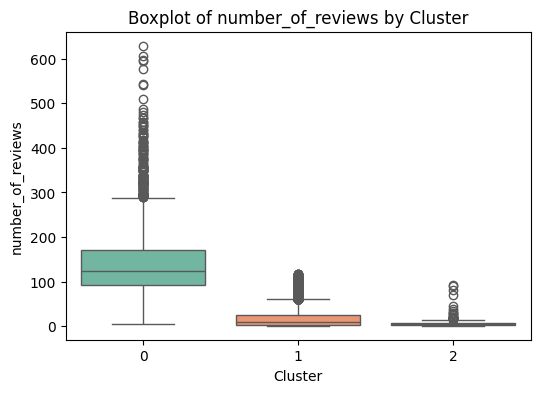

<ipython-input-20-810da834e4ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')


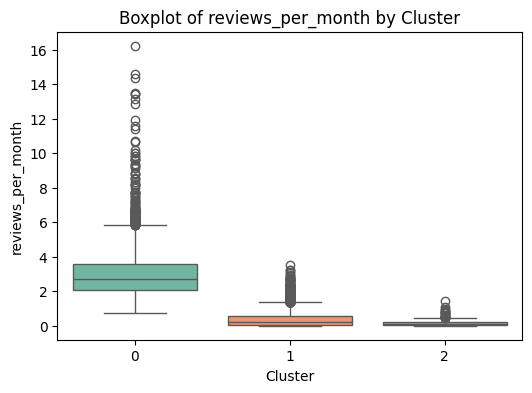

In [20]:
features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=col, data=df, palette='Set2')
    plt.title(f"Boxplot of {col} by Cluster")
    plt.show()


<ipython-input-21-5d7f4bf80b8b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='pastel')


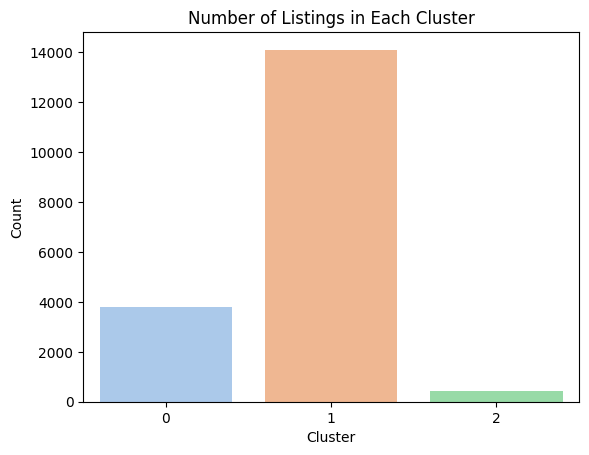

In [21]:
sns.countplot(x='Cluster', data=df, palette='pastel')
plt.title("Number of Listings in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()
